## Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score,confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math

## Load & Split Data

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()

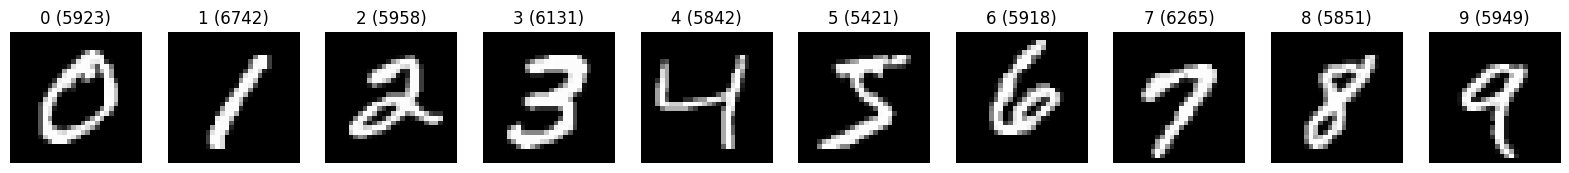

In [3]:
unique, counts = np.unique(y_train, return_counts=True)
digit_counts = dict(zip(unique, counts))

fig, axs = plt.subplots(1, 10, figsize=(20, 2))  # Adjust figsize as needed
for digit in unique:
    index = np.where(y_train == digit)[0][0]  # Find the first occurrence of each digit
    axs[digit].imshow(X_train[index], cmap='gray')
    axs[digit].title.set_text(f'{digit} ({digit_counts[digit]})')
    axs[digit].axis('off')

plt.show()

## Normalize Data

In [4]:
X_train, X_test = X_train/255.0, X_test/255.0
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

## Build Model

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Train Model

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 31s 65ms/step - loss: 0.3072 - accuracy: 0.9031 - val_loss: 0.0605 - val_accuracy: 0.9801
Epoch 2/5
469/469 [==============================] - 30s 65ms/step - loss: 0.0816 - accuracy: 0.9747 - val_loss: 0.0387 - val_accuracy: 0.9867
Epoch 3/5
469/469 [==============================] - 30s 63ms/step - loss: 0.0617 - accuracy: 0.9805 - val_loss: 0.0339 - val_accuracy: 0.9886
Epoch 4/5
469/469 [==============================] - 29s 61ms/step - loss: 0.0514 - accuracy: 0.9837 - val_loss: 0.0265 - val_accuracy: 0.9915
Epoch 5/5
469/469 [==============================] - 30s 63ms/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0296 - val_accuracy: 0.9901


## Evaluate Model

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 5ms/step - loss: 0.0296 - accuracy: 0.9901
Test accuracy: 0.9901


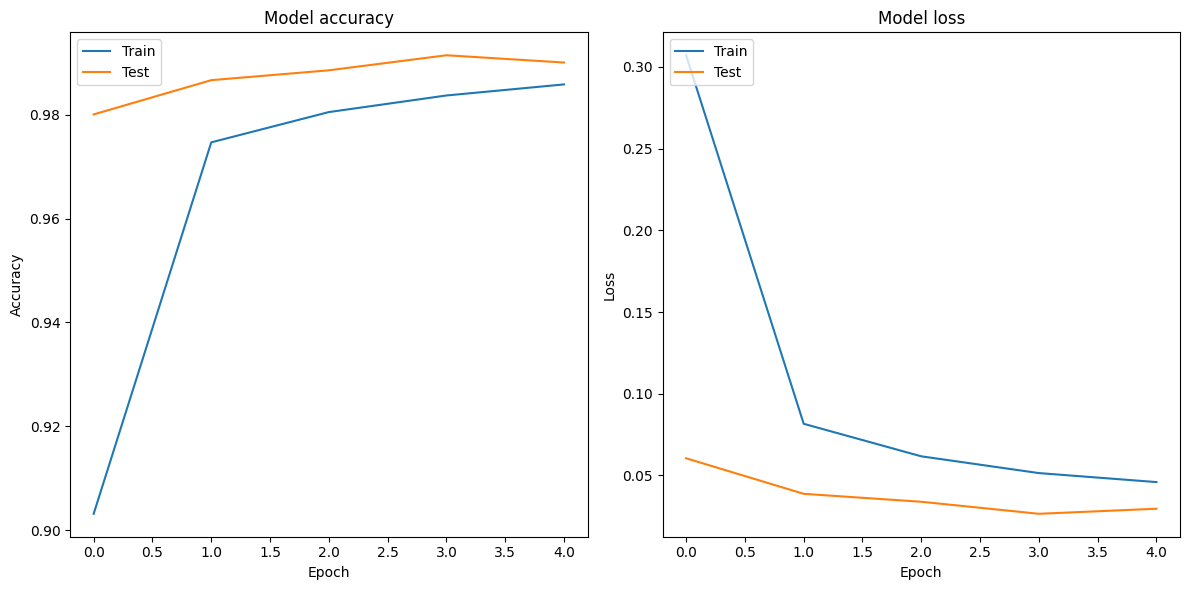

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Saving Model

In [9]:
model.save("mnist_conv2d.h5")

c:\Users\Beso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# TEST

313/313 [==============================] - 1s 4ms/step


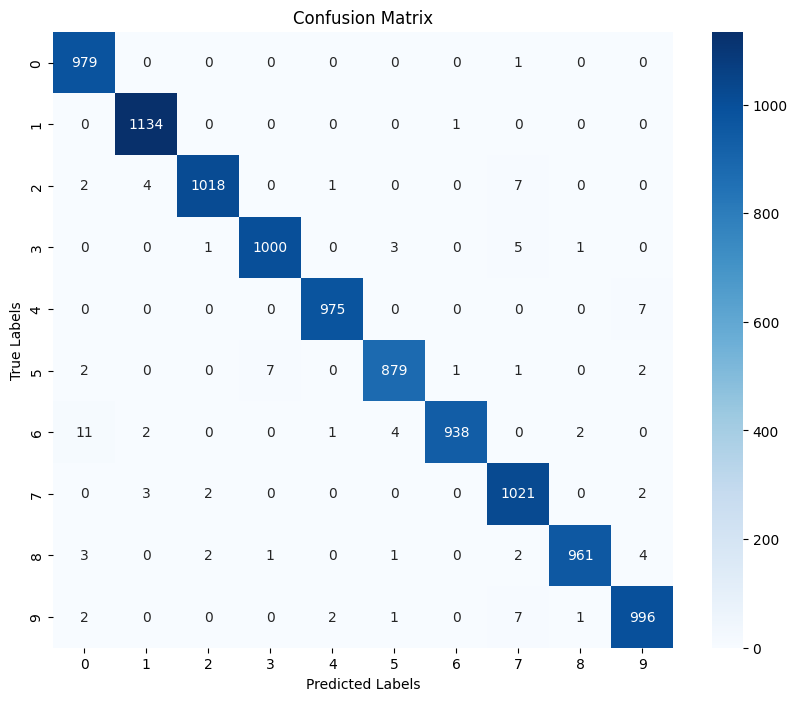

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Visualize the confusion matrix
labels = [str(i) for i in range(10)]
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# PLOTS

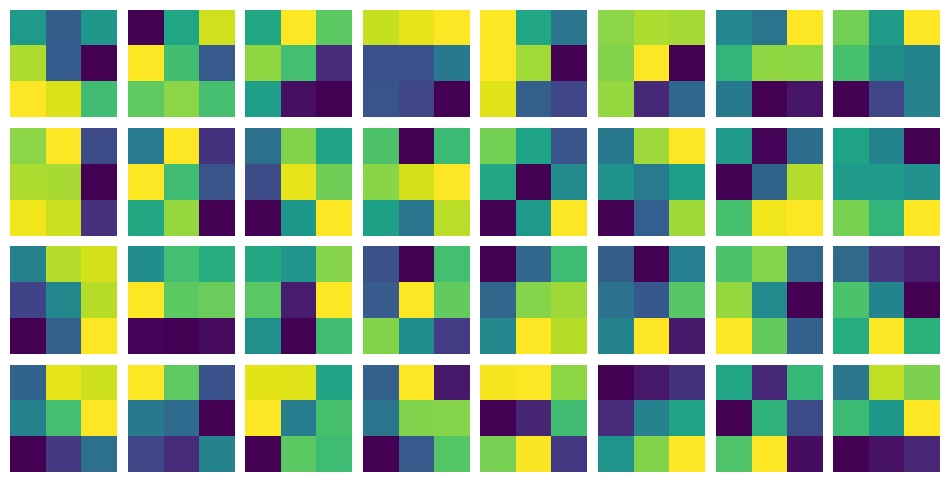

In [11]:
filters, biases = model.layers[0].get_weights()
filter_count = filters.shape[3]

n_columns = 8
n_rows = np.ceil(filter_count / n_columns).astype(int)
plt.figure(figsize=(n_columns*1.5, n_rows*1.5))

for i in range(filter_count):
    f = filters[:, :, :, i]
    plt.subplot(n_rows, n_columns, i+1)
    plt.imshow(f[:, :, :], aspect='auto')
    plt.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

1/1 [==============================] - 0s 20ms/step


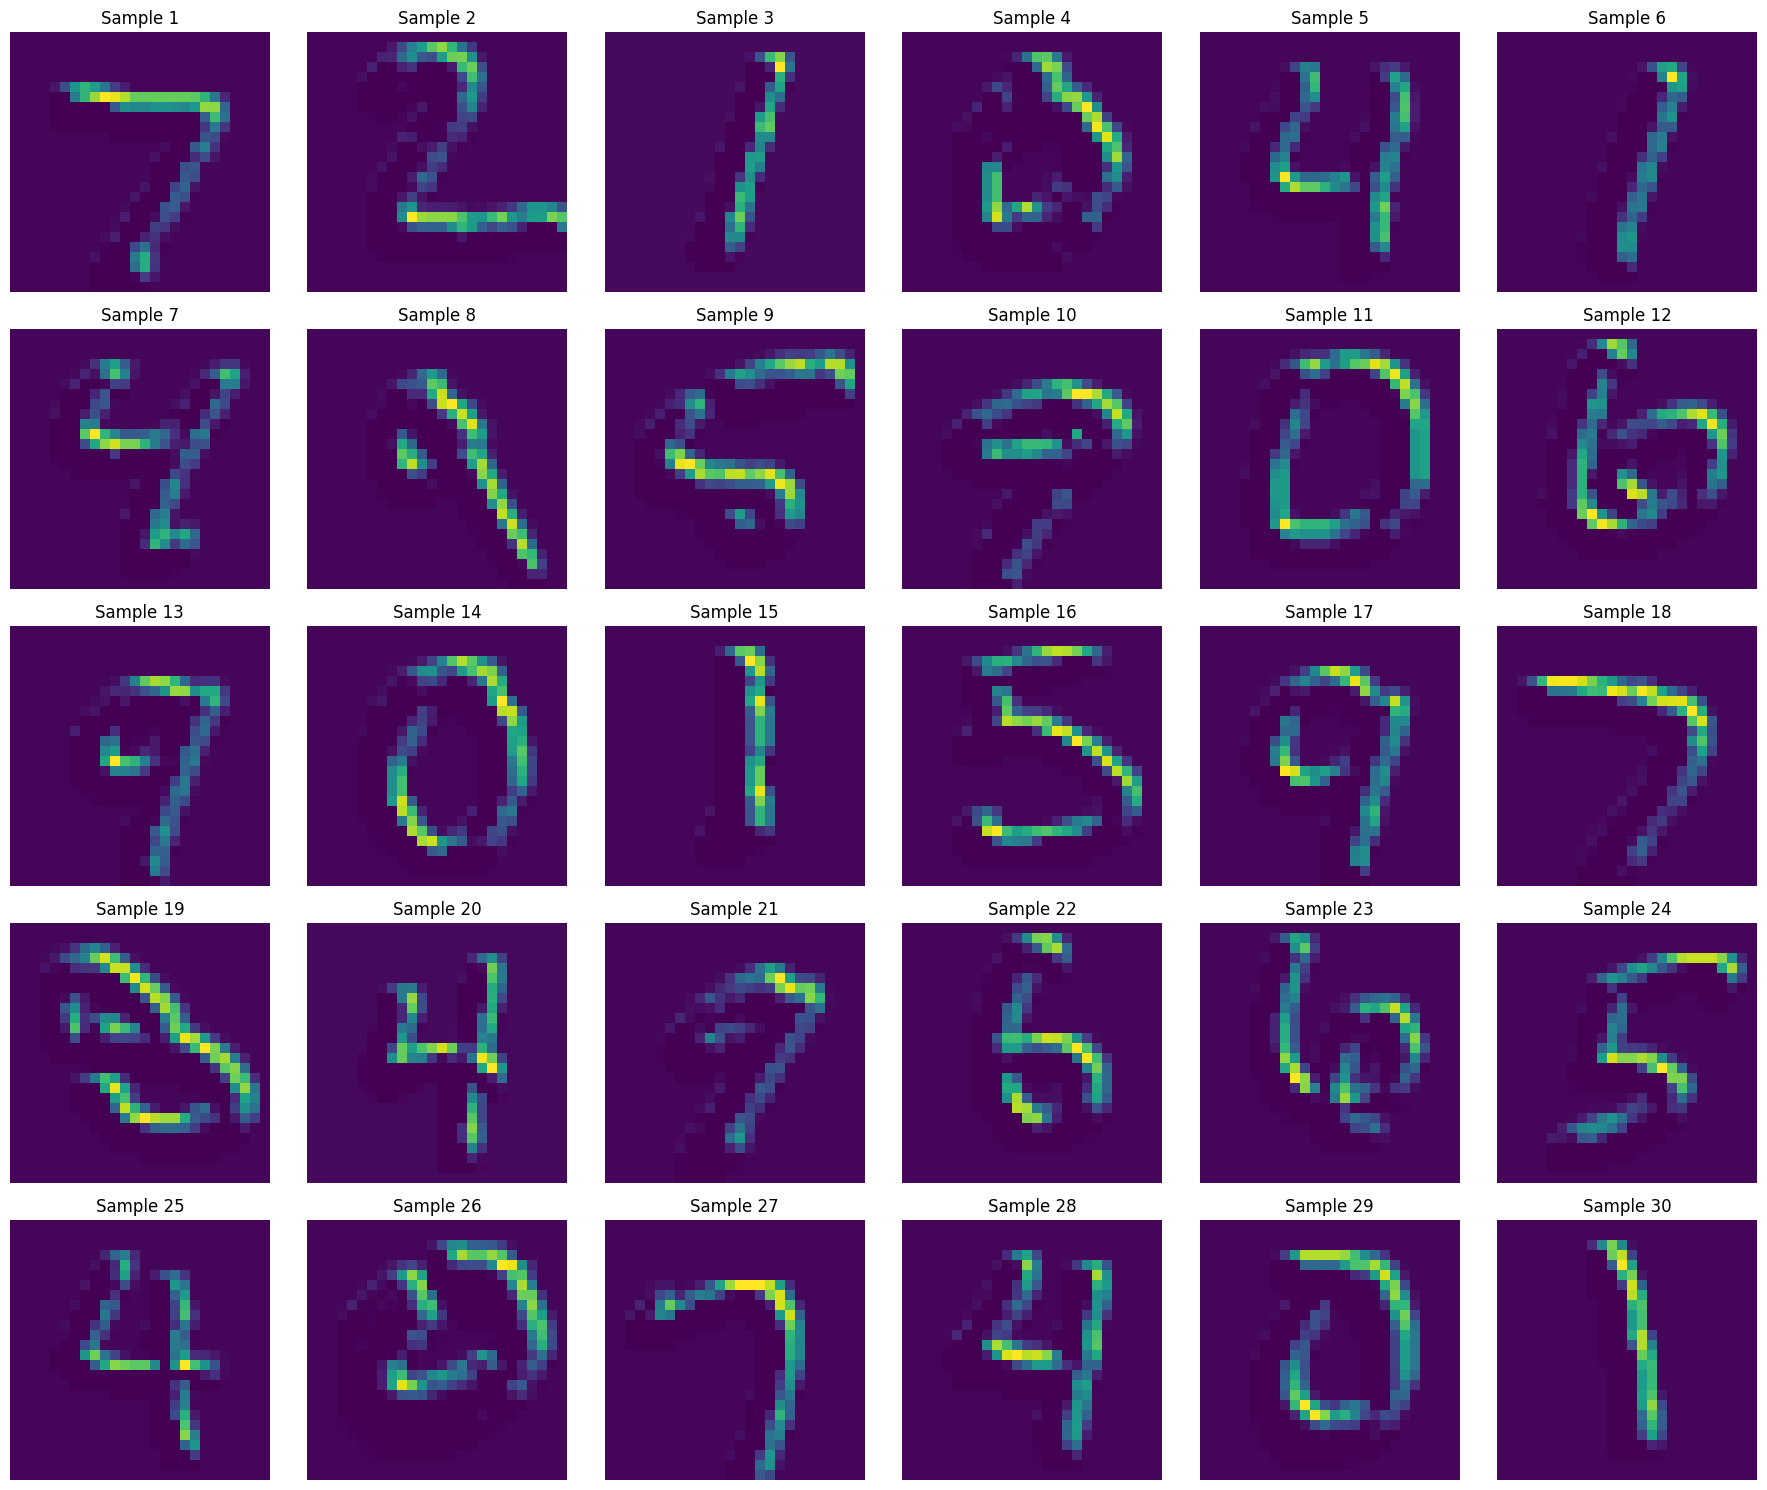

In [12]:
num_samples = 30
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Calculate the number of rows and columns for subplots
n_cols = math.ceil(math.sqrt(num_samples))
n_rows = math.ceil(num_samples / n_cols)
plt.figure(figsize=(n_cols * 3, n_rows * 3))

for i in range(num_samples):
    activations = activation_model.predict(X_test[i][np.newaxis, ...])
    first_layer_activation = activations[0]
    ax = plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(first_layer_activation[0, :, :, 0], cmap='viridis')
    plt.title(f"Sample {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()